<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deep_learning_CNN/blob/master/Guava_disease_data_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d asadullahgalib/guava-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/asadullahgalib/guava-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.51G/1.52G [00:24<00:00, 90.9MB/s]
100% 1.52G/1.52G [00:24<00:00, 66.9MB/s]


In [2]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('guava-disease-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [3]:
import os

# List the contents of the dataset folder
print(os.listdir('/content'))

['.config', 'dataset_summary.csv', 'GuavaDiseaseDataset', 'guava-disease-dataset.zip', 'sample_data']


In [4]:
print(os.listdir('/content/GuavaDiseaseDataset/GuavaDiseaseDataset'))

['train', 'test', 'val']


In [5]:
train_dir = '/content/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/content/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
validate_dir='/content/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

In [6]:
train_data=os.listdir(train_dir)
test_data=os.listdir(test_dir)
validate_data=os.listdir(validate_dir)

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

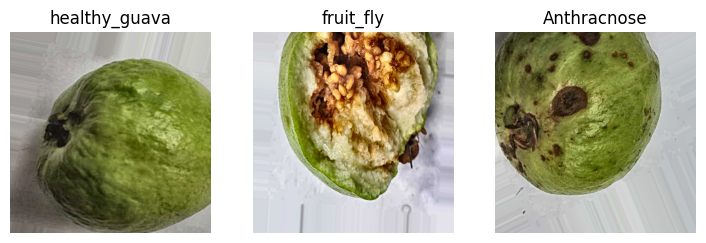

In [8]:
def plot_images(image_classes):

    plt.figure(figsize=(12,12))
    for i , category in enumerate(image_classes):
        image_path = os.path.join(train_dir, category)
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = os.path.join(image_path, first_image)

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img)/255

        plt.subplot(4,4,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

    plt.show()

plot_images(train_data)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

#rescale data
#image_generator = ImageDataGenerator(rescale=1/255)

#train image
train_data = datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='categorical'
                                             )

#test image
test_data = datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='categorical'
                                             )
#validate data
val_data =datagen.flow_from_directory(validate_dir,
                                              target_size = (224,224),
                                               batch_size = 10,
                                               class_mode = 'categorical')

Found 2647 images belonging to 3 classes.
Found 382 images belonging to 3 classes.
Found 755 images belonging to 3 classes.


In [10]:
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# Add flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,955,331 (49.42 MB)

 Trainable params: 12,955,331 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model_history=model.fit(train_data,
                        validation_data=val_data,
                        epochs=5)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.5370 - loss: 0.9078 - val_accuracy: 0.7417 - val_loss: 0.5719
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7628 - loss: 0.5579 - val_accuracy: 0.9020 - val_loss: 0.2698
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.8988 - loss: 0.2837 - val_accuracy: 0.8874 - val_loss: 0.2674
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9107 - loss: 0.2330 - val_accuracy: 0.9391 - val_loss: 0.1644
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.9315 - loss: 0.1886 - val_accuracy: 0.9377 - val_loss: 0.1485


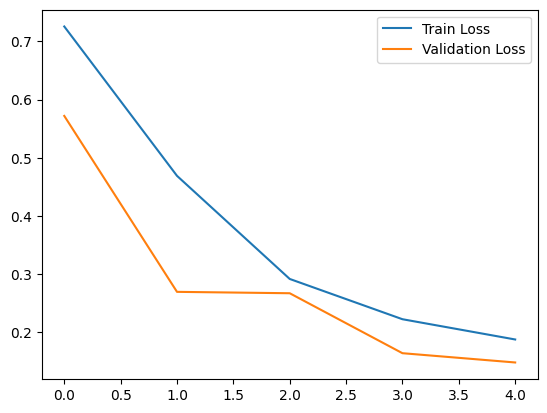

In [13]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

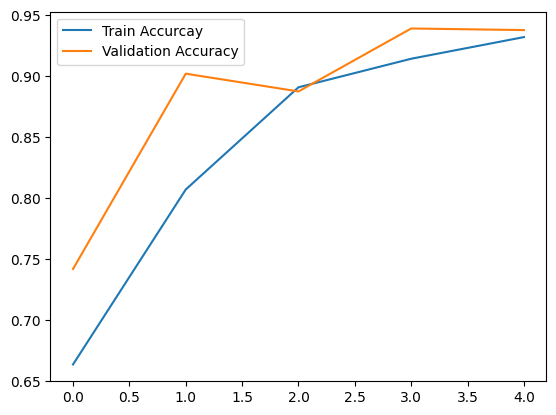

In [14]:
plt.plot(model_history.history['accuracy'], label = 'Train Accurcay')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data)

39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.9100 - loss: 0.2177


[0.17726299166679382, 0.9319371581077576]

In [16]:
class_map=dict([value,key] for key , value in train_data.class_indices.items())
class_map

{0: 'Anthracnose', 1: 'fruit_fly', 2: 'healthy_guava'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


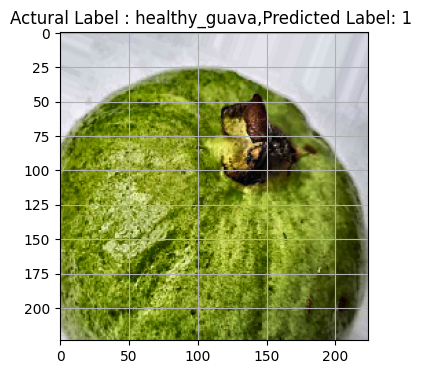

In [17]:
import numpy as np

def prediction (test_image, actual_label):
    #load & preprocessing image
    testing_img=image.load_img(test_image,target_size=(224,224))
    test_img_array=image.img_to_array(testing_img)/255

    test_img_input=test_img_array.reshape(1, test_img_array.shape[0],
                                         test_img_array.shape[1],
                                         test_img_array.shape[2])

    # make prediction
    predicted_class=np.argmax(model.predict(test_img_input))
    predicted_img=class_map[predicted_class]


    plt.figure(figsize=(4,4))
    plt.imshow(test_img_array)
    plt.title(f'Actural Label : {actual_label},Predicted Label: {predicted_class} ')

    plt.grid()
    plt.show()

test_image=r'/content/GuavaDiseaseDataset/GuavaDiseaseDataset/test/healthy_guava/106_unsharp_clahe_augmented_4.png'
prediction (test_image, actual_label='healthy_guava')